<IPython.core.display.Javascript object>


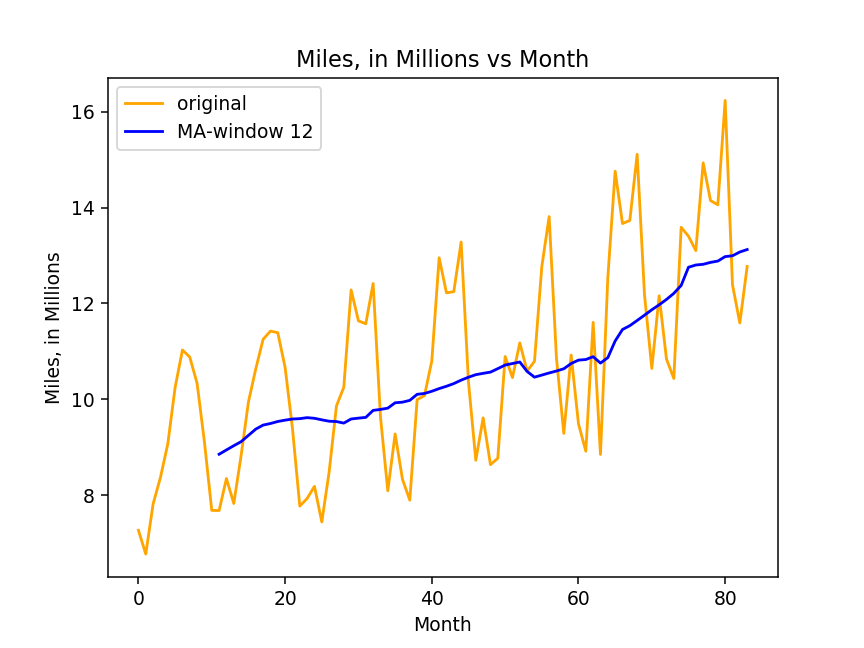

Moving average window of 12 is suitable because the seasonal period is 12.
The trendline is increasing overall, but there are short drops approximately between month 23-27, 52-54, and 61-63.


In [4]:
# Changhyun Lee
# UK Airline Miles Projection 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib notebook

#1
data = pd.read_excel('UK_Airline_DataSet.xlsx', header=0)
df = pd.DataFrame(data, columns = ['Miles, in Millions'])
plt.plot(df, color = 'orange', label = 'original')

#3
rolling_mean = df.rolling(window=12).mean()
plt.plot(rolling_mean, color = 'blue', label = 'MA-window 12')
print('Moving average window of 12 is suitable because the seasonal period is 12.')

#graph mechanics
plt.ylabel("Miles, in Millions")
plt.xlabel('Month')
plt.title("Miles, in Millions vs Month")
plt.legend()

#4
print("The trendline is increasing overall, but there are short drops approximately between month 23-27, 52-54, and 61-63.")

<IPython.core.display.Javascript object>


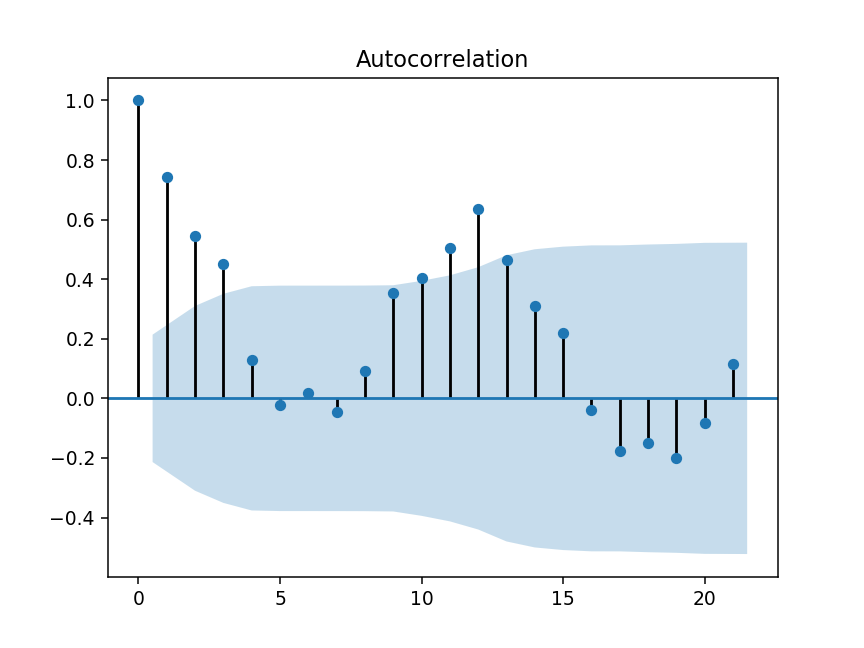

Seasonal period is 12.


In [5]:
#2
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags=21)
plt.show()
print("Seasonal period is 12.")

#Below is first diff data.
        Month  Miles, in Millions   diff
0  1964-01-01               7.269    NaN
1  1964-02-01               6.775 -0.494
2  1964-03-01               7.819  1.044
3  1964-04-01               8.371  0.552
4  1964-05-01               9.069  0.698
5  1964-06-01              10.248  1.179
6  1964-07-01              11.030  0.782
7  1964-08-01              10.882 -0.148
8  1964-09-01              10.333 -0.549
9  1964-10-01               9.109 -1.224
10 1964-11-01               7.685 -1.424
11 1964-12-01               7.682 -0.003
12 1965-01-01               8.350  0.668
13 1965-02-01               7.829 -0.521
14 1965-03-01               8.829  1.000
15 1965-04-01               9.948  1.119
16 1965-05-01              10.638  0.690
17 1965-06-01              11.253  0.615
18 1965-07-01              11.424  0.171
19 1965-08-01              11.391 -0.033
20 1965-09-01              10.665 -0.726
21 1965-10-01               9.396 -1.269
22 1965-11-01               7.

<IPython.core.display.Javascript object>


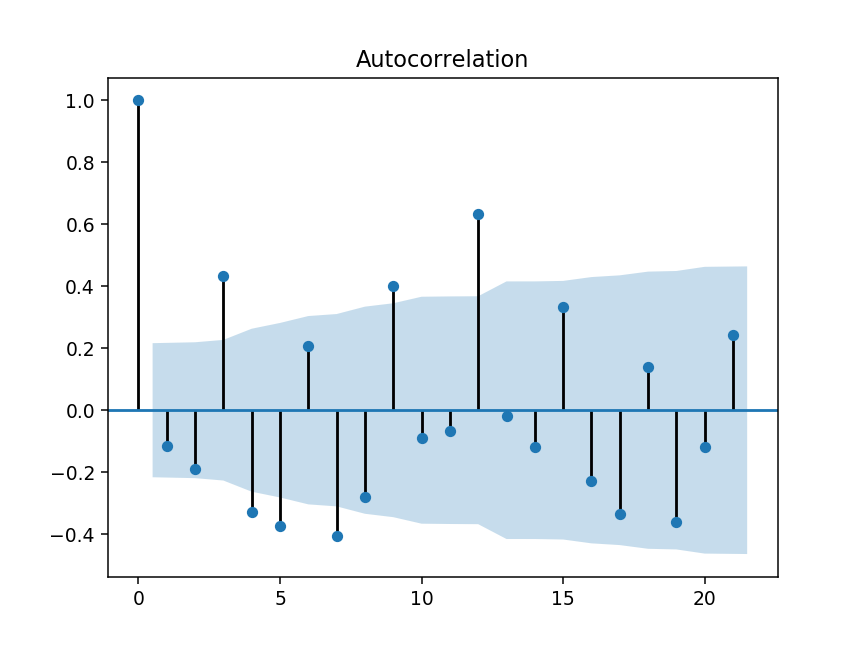

<IPython.core.display.Javascript object>


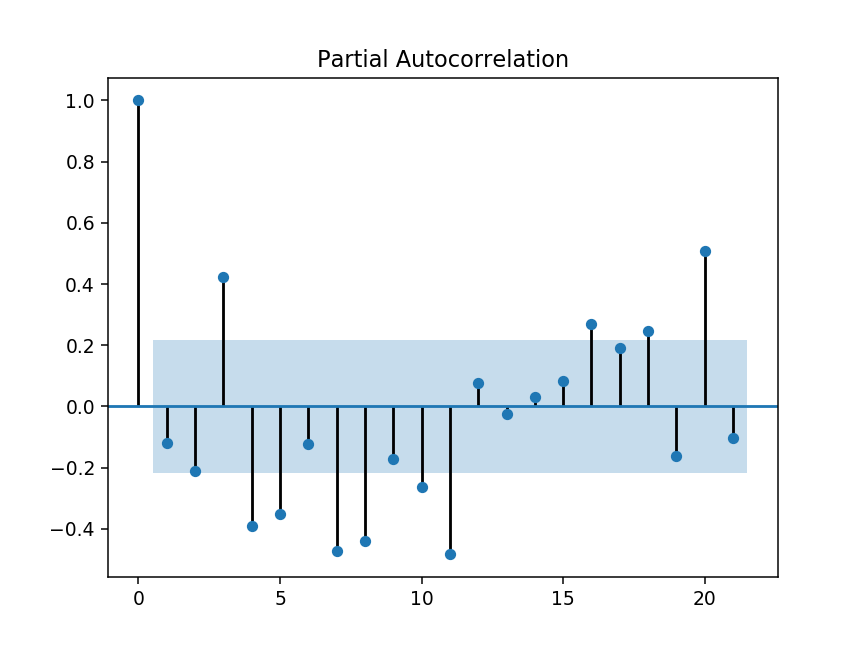

Significant lags on ACF are 3,4,5,7,9,12; significant lags for PACF are 3,4,5,7,8,10.
These lags are much out of the confidence interval, not including lag =0


In [7]:
#5

#first difference data
data['diff'] = data['Miles, in Millions'].diff()
print('#Below is first diff data.')
print(data)

# ACF & PACF on differenced data
plot_acf(data.iloc[1:83, 2:3].values, lags=21)
plt.show()

plot_pacf(data.iloc[1:83, 2:3].values, lags=21)
plt.show()
print('Significant lags on ACF are 3,4,5,7,9,12; significant lags for PACF are 3,4,5,7,8,10.')
print('These lags are much out of the confidence interval, not including lag =0')


In [8]:
#first difference at lag =12, ***rolling mean, not ARIMA moving average = 12
#take difference of 1 and do 12
#state space sarimax

<IPython.core.display.Javascript object>


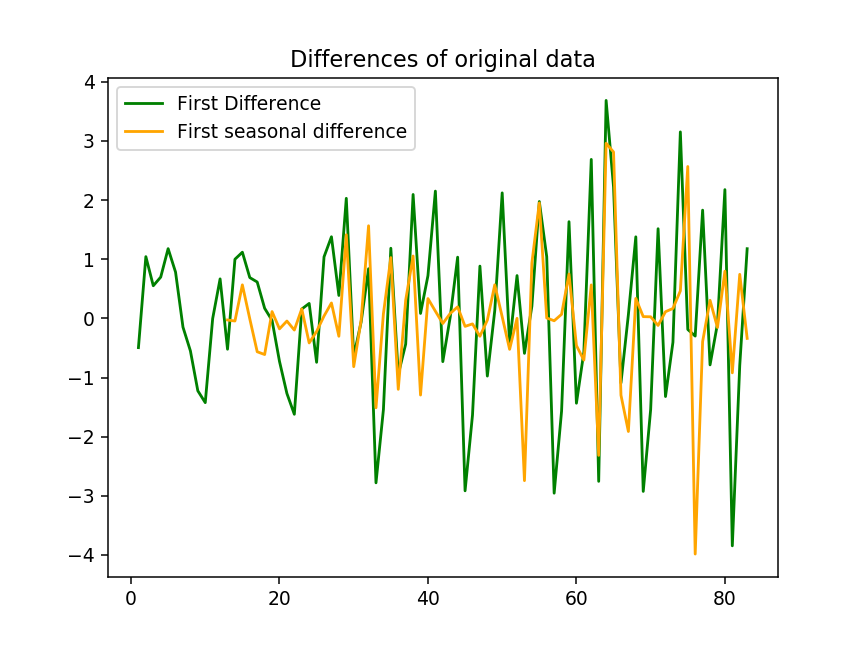

        Month  Miles, in Millions   diff  diff12
0  1964-01-01               7.269    NaN     NaN
1  1964-02-01               6.775 -0.494     NaN
2  1964-03-01               7.819  1.044     NaN
3  1964-04-01               8.371  0.552     NaN
4  1964-05-01               9.069  0.698     NaN
5  1964-06-01              10.248  1.179     NaN
6  1964-07-01              11.030  0.782     NaN
7  1964-08-01              10.882 -0.148     NaN
8  1964-09-01              10.333 -0.549     NaN
9  1964-10-01               9.109 -1.224     NaN
10 1964-11-01               7.685 -1.424     NaN
11 1964-12-01               7.682 -0.003     NaN
12 1965-01-01               8.350  0.668     NaN
13 1965-02-01               7.829 -0.521  -0.027
14 1965-03-01               8.829  1.000  -0.044
15 1965-04-01               9.948  1.119   0.567
16 1965-05-01              10.638  0.690  -0.008
17 1965-06-01              11.253  0.615  -0.564
18 1965-07-01              11.424  0.171  -0.611
19 1965-08-01       

<IPython.core.display.Javascript object>


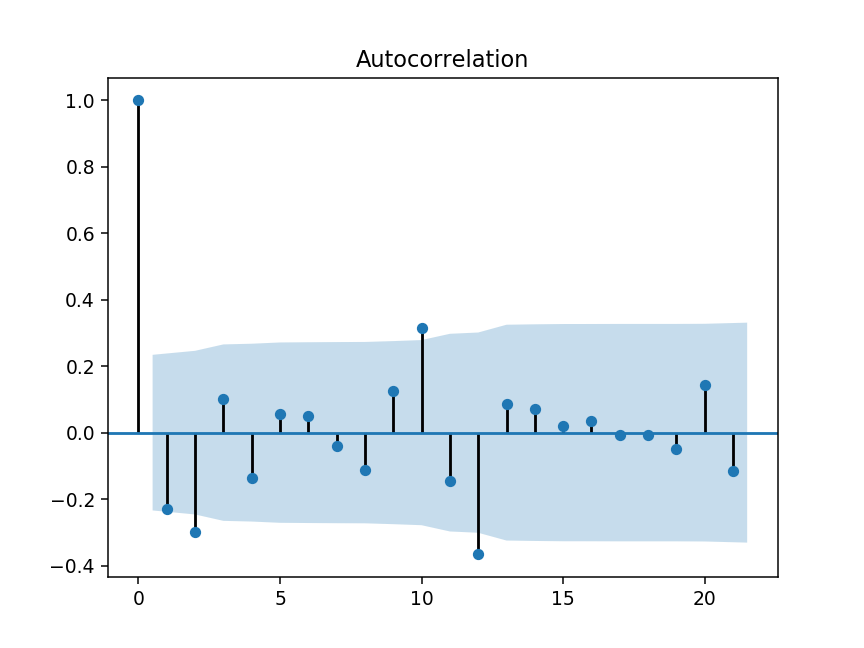

<IPython.core.display.Javascript object>


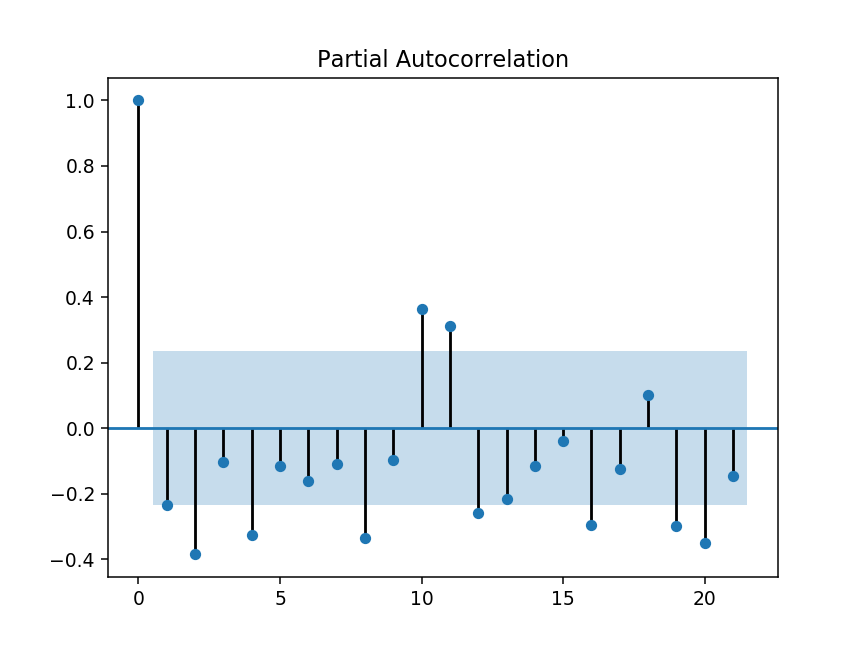

Significant lags on ACF are 1,2,10,12; significant lags for PACF are 2,4,8,10,11.
These lags are much out of the confidence interval.


In [9]:
#6
import matplotlib.pyplot as plt2
plt2.figure()

# first difference plot
plt2.plot(data['diff'], label = 'First Difference', color = 'green')
# seasonal difference data & plot
data['diff12'] = data['diff'].diff(periods=12)
plt2.plot(data['diff12'], label = 'First seasonal difference', color = 'orange')

plt2.legend()
plt2.title('Differences of original data')
plt2.show()
print(data)

#ACF & PACF on seasonal diff data
plot_acf(data.iloc[13:83, 3:4].values, lags=21)
plt2.show()

plot_pacf(data.iloc[13:83, 3:4].values, lags=21)
plt2.show()
print('Significant lags on ACF are 1,2,10,12; significant lags for PACF are 2,4,8,10,11.')
print('These lags are much out of the confidence interval.')


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
#7(a)
from statsmodels.tsa.statespace.sarimax import SARIMAX
dict = {}

# try:
#     do_something()
# except Exception:
#     pass

# Fit the model
for x in range(5):
    for y in range(5):
        for z in range(5):
            for q in range(5):  
                #Using only first 6 years of data to model
                try:
                    mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(x,1,y), seasonal_order=(z,1,q,12))
                    res = mod.fit(disp=False)
                    #print(res.summary())
                    dict[res.aic] = '(' + str(x) + ',1,' + str(y) + ')(' + str(z) + ',1,' + str(q) + ')'
                except Exception:
                    pass

print('# For the calculation of the output, I am outputing AIC values for each combination because it is the evaulation criteria I will be using. Also, outputing the full results for all combinations would be too much, so I am purposely excluding the part.')
#7(b)
print('# Below are sorted AIC values for matching parameter combinations')
print('AIC (p,d,q)(P,D,Q)')
#sort lowest to highest AIC value
for i in sorted (dict.keys()) :  
     print(i, dict[i]) 
        
        
print('Best choice of parameters is (2,1,3)(1,1,0,12) because it has the lowest AIC value of 145.84640078826877, and it also has relatively low order (3 & below according to TA).')


# For the calculation of the output, I am outputing AIC values for each combination because it is the evaulation criteria I will be using. Also, outputing the full results for all combinations would be too much, so I am purposely excluding the part.
# Below are sorted AIC values for matching parameter combinations
AIC (p,d,q)(P,D,Q)
145.8488535297066 (2,1,3)(1,1,0)
146.12922256421646 (2,1,3)(0,1,1)
147.11263072861115 (0,1,2)(1,1,0)
147.30249201467245 (3,1,3)(1,1,0)
147.39708313300855 (2,1,3)(2,1,0)
147.49006271399273 (0,1,2)(0,1,1)
147.90036500889028 (2,1,4)(0,1,1)
148.08678856741017 (2,1,3)(1,1,1)
148.27983079044708 (2,1,4)(1,1,0)
148.2906931271734 (3,1,3)(0,1,1)
148.33454090036764 (1,1,2)(1,1,0)
148.54519320217915 (1,1,2)(0,1,1)
148.60779055427525 (0,1,3)(1,1,0)
148.61779243694167 (0,1,2)(0,1,0)
148.75435845425167 (0,1,3)(0,1,1)
148.92493509606723 (1,1,1)(1,1,0)
149.1124917794941 (0,1,2)(1,1,1)
149.11261281012048 (0,1,2)(2,1,0)
149.26530012493288 (4,1,3)(0,1,1)
149.296915721421 (3,1,

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   71
Model:             SARIMAX(2, 1, 3)x(1, 1, 0, 12)   Log Likelihood                 -65.924
Date:                            Sun, 26 Jul 2020   AIC                            145.849
Time:                                    19:03:46   BIC                            160.272
Sample:                                         0   HQIC                           151.467
                                             - 71                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4535      0.228     -6.368      0.000      -1.901      -1.006
ar.L2         -0.4722      0.248   

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   71
Model:             SARIMAX(2, 1, 3)x(2, 1, 0, 12)   Log Likelihood                 -65.699
Date:                            Sun, 26 Jul 2020   AIC                            147.397
Time:                                    19:03:50   BIC                            163.881
Sample:                                         0   HQIC                           153.818
                                             - 71                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4457      0.165     -8.756      0.000      -1.769      -1.122
ar.L2         -0.5500      0.158   

<IPython.core.display.Javascript object>


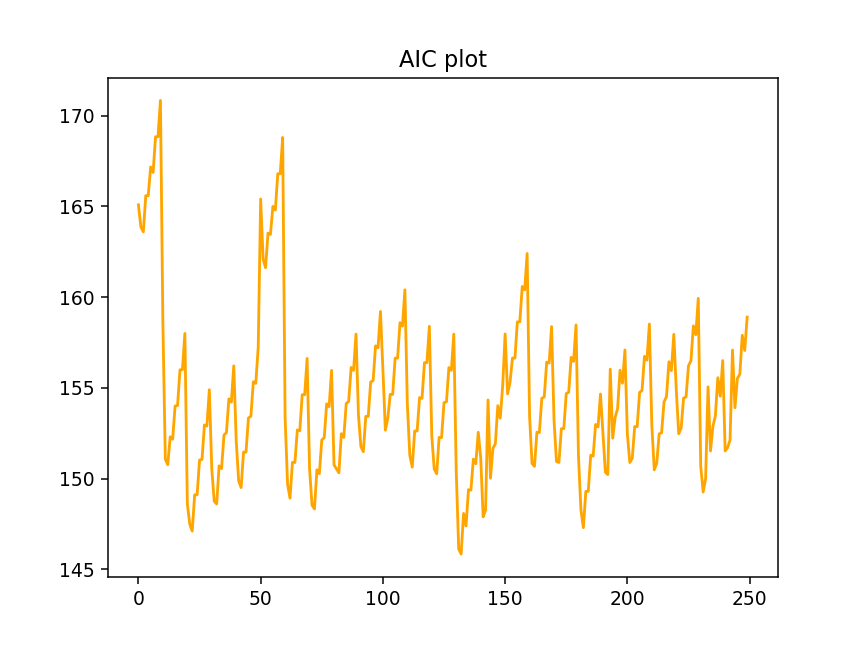

The lowest AIC value is at 132th value shown above
145.8488535297066 (2,1,3)(1,1,0)


In [12]:
# top 5 AIC values sample full result summary output
# 145.84640078826877 (2,1,3)(1,1,0)
# 146.12925625896588 (2,1,3)(0,1,1)
# 147.11257810156823 (0,1,2)(1,1,0)
# 147.3026918820013 (3,1,3)(1,1,0)
# 147.39685088338774 (2,1,3)(2,1,0)
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(2,1,3), seasonal_order=(1,1,0,12))
res = mod.fit(disp=False)
print(res.summary())
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(2,1,3), seasonal_order=(0,1,1,12))
res = mod.fit(disp=False)
print(res.summary())
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(0,1,2), seasonal_order=(1,1,0,12))
res = mod.fit(disp=False)
print(res.summary())
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(3,1,3), seasonal_order=(1,1,0,12))
res = mod.fit(disp=False)
print(res.summary())
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(2,1,3), seasonal_order=(2,1,0,12))
res = mod.fit(disp=False)
print(res.summary())

#AIC plot
arr = []
for i in (dict.keys()) :  
     arr.append(i)
plt.figure()
plt.title('AIC plot')
plt.plot(arr, color = 'orange', label = 'original')

print('The lowest AIC value is at 132th value shown above')
print(arr[132], dict[arr[132]])

#original 7th year
        Month  Miles, in Millions   diff  diff12
72 1970-01-01              10.840 -1.321   0.113
73 1970-02-01              10.436 -0.404   0.168
74 1970-03-01              13.589  3.153   0.465
75 1970-04-01              13.402 -0.187   2.568
76 1970-05-01              13.103 -0.299  -3.984
77 1970-06-01              14.933  1.830  -0.392
78 1970-07-01              14.147 -0.786   0.306
79 1970-08-01              14.057 -0.090  -0.154
80 1970-09-01              16.234  2.177   0.798
81 1970-10-01              12.389 -3.845  -0.920
82 1970-11-01              11.594 -0.795   0.745
83 1970-12-01              12.772  1.178  -0.338

#forecast 7th year in order corresponding to above data
[10.36962547  9.86929244 12.61975609 10.59798038 13.25259258 13.79665201
 13.66238214 14.2870749  15.83395168 12.58009942 11.33090179 12.25162466]


<IPython.core.display.Javascript object>


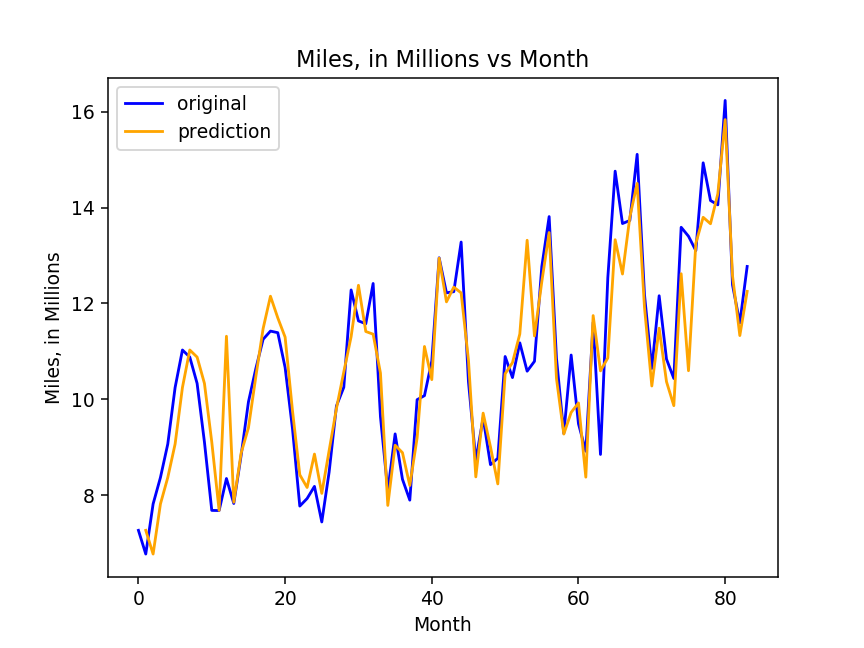

In [13]:
#8
# forecasting using param (2,1,3)(1,1,0,12)
mod = SARIMAX(data.iloc[0:71, 1:2].values, order=(2,1,3), seasonal_order=(1,1,0,12))
res = mod.fit(disp=False)
pred = res.predict(start=data.index[1], end = data.index[83]) #72-83 -> 7th year

# compare 7th year data (last 12months)
print('#original 7th year')
print(data.tail(12))
print()
print('#forecast 7th year in order corresponding to above data')
print(pred[71:83])

# graphical comparison from original to forecasted data 7th year (72th-83th months)
plt.figure()
plt.plot(df, color = 'blue', label = 'original')
plt.plot(range(1,1+len(pred)), pred, color = 'orange', label = 'prediction') #range(1,1+len(pred)) ->shifting graph

#graph mechanics
plt.ylabel("Miles, in Millions")
plt.xlabel('Month')
plt.title("Miles, in Millions vs Month")
plt.legend()


In [14]:
print('Overall, the forecasted values for 7th year closely follow the original data but values are very slightly on the lower side. However, month 75 has significantly lower forecast value and month 77 also has low forecast compared to the original. Otherwise, forecast follows the general trend and seasonality similar to the original.')
print()
print('A way to improve forecast would be to incorporate cross validation featuring different range of time periods. We are only using one single range of 6 year period, but we could be comparing the data with i.e. 3,4,5 year range data. Another way would be to cross reference different evaluation criteria such as AIC, BIC, and MSE and possibly create an algorithm that detects the combination that provides the best result in all criteria.')



Overall, the forecasted values for 7th year closely follow the original data but values are very slightly on the lower side. However, month 75 has significantly lower forecast value and month 77 also has low forecast compared to the original. Otherwise, forecast follows the general trend and seasonality similar to the original.

A way to improve forecast would be to incorporate cross validation featuring different range of time periods. We are only using one single range of 6 year period, but we could be comparing the data with i.e. 3,4,5 year range data. Another way would be to cross reference different evaluation criteria such as AIC, BIC, and MSE and possibly create an algorithm that detects the combination that provides the best result in all criteria.
